In [21]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
from platform import python_version
print(python_version())

3.6.6


In [22]:
#data is unsupervised so we dont allow labels:
m1,cov1=[9,8],[[1.5,2],[1,2]]
m2,cov2=[5,13],[[2.5,-1.5],[-1.5,1.5]]
m3,cov3=[3,7],[[0.25,0.5],[-0.1,0.5]]

data1=np.random.multivariate_normal(m1,cov1,250)
#print(data1)
data2=np.random.multivariate_normal(m2,cov2,180)
data3=np.random.multivariate_normal(m3,cov3,100)

X=np.vstack((data1,np.vstack((data2,data3))))#inside vstack we should pass 
print(X)
np.random.shuffle(X)
print(X.shape[0])
print(X.shape[1])
#X.shape

[[ 7.13576164  4.89162306]
 [10.2778101   8.46065012]
 [ 9.72515275  8.80869843]
 ...
 [ 3.01384361  7.45785371]
 [ 3.06703221  6.87908447]
 [ 4.04919199  8.20297475]]
530
2


C:\Users\Varun\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  
C:\Users\Varun\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  if __name__ == '__main__':


In [34]:
m=X.shape[0]
#print(np.arange(m))
row_indexes=np.random.choice(np.arange(m),3)
print(row_indexes)

[435 187 440]


In [45]:
#k is centroid:
def kMeans(X,k=3,max_iter=15):
    m=X.shape[0]
    row_indexes=np.random.choice(np.arange(m),k)
    centroids=X[row_indexes,:]
    print("centroids:",centroids)
    for iter in range(max_iter):
        #C=np.asarray([np.argmin([np.dot(x-c,x-c) for c in centroids]) for x in X])
        C=[]
        for x in X:
            distances=[]
            for c in centroids:
                d=np.dot(x-c,x-c)
                distances.append(d)
            distances=np.asarray(distances)
            ci=np.argmin(distances)
            C.append(ci)
        C=np.asarray(C)
        print("[[",C,"]]")
        new_centroids=[]
        #centroids=[X[C==i].mean(axis=0) for i in range(k)]
        for i in range(k):
            new_c=X[C==i].mean(axis=0)
            new_centroids.append(new_c)
        centroids=np.asarray(new_centroids)
        #for i in range(k):
         #   centroids[i]=X[C==i].mean(axis=0)
    return centroids

        
                
                
    

In [46]:
centroids=kMeans(X)
print("ans=",centroids)

centroids: [[ 4.91451963 11.89232166]
 [ 7.93600768  6.90260471]
 [ 4.04359125  7.62404401]]
[[ [0 1 2 2 0 1 0 1 0 0 1 1 1 1 1 2 1 1 1 1 0 2 2 2 1 1 2 0 2 0 1 1 2 0 1 0 2
 0 1 0 2 0 1 1 1 1 1 1 0 2 1 1 1 0 1 2 2 1 1 0 1 1 0 0 2 0 0 0 0 1 1 1 0 1
 1 0 0 2 2 0 1 1 0 1 1 2 0 0 1 2 1 0 2 1 1 1 0 2 0 1 0 0 1 1 0 1 2 1 1 1 0
 1 0 2 0 1 0 1 1 2 1 1 0 1 2 1 1 2 1 2 0 1 1 2 1 0 0 1 0 2 1 0 0 1 1 1 0 1
 1 0 0 0 2 0 1 0 1 2 2 0 1 1 2 1 0 0 0 1 1 0 1 1 0 1 2 2 1 1 1 0 0 1 2 1 1
 0 0 1 2 1 1 2 0 1 0 0 0 0 1 0 2 2 1 0 1 0 2 1 1 1 1 2 0 2 0 1 2 0 0 1 0 0
 0 0 1 1 2 1 2 1 1 0 1 0 1 0 0 0 0 0 1 0 1 2 2 1 1 1 1 0 1 1 1 1 0 0 2 1 1
 1 1 1 1 1 2 2 2 1 1 1 0 1 1 1 2 1 2 0 2 2 2 2 2 2 0 1 0 0 0 2 1 2 1 1 2 0
 0 0 2 2 1 0 1 1 0 1 2 1 0 0 1 0 1 1 0 1 0 1 0 1 1 1 1 0 1 1 2 1 0 1 1 0 0
 2 2 0 0 1 2 2 1 0 1 1 1 0 1 1 1 2 2 0 1 0 0 2 1 1 1 1 1 1 2 1 0 1 1 1 1 1
 1 0 1 1 2 0 0 0 1 0 0 0 1 1 0 0 0 1 2 2 1 0 1 0 1 0 0 1 2 2 2 0 2 1 0 2 0
 1 2 2 0 0 2 1 0 0 2 2 0 2 0 1 0 1 1 1 1 0 2 0 0 1 1 0 0 0 1 0 1 1 2 1 1 2
 1 1

[[ [0 1 2 2 0 1 0 1 0 0 1 1 2 1 1 2 1 1 1 1 0 2 2 2 1 1 2 0 2 0 1 1 2 0 1 0 2
 0 1 0 2 0 1 1 2 1 1 1 0 2 1 1 1 0 1 2 2 1 1 0 1 1 0 0 2 0 0 0 0 1 1 1 0 1
 1 0 0 2 2 0 1 1 0 1 1 2 0 0 1 2 1 0 2 1 1 1 0 2 0 1 0 0 1 1 0 1 2 1 1 1 0
 1 0 2 0 1 0 1 1 2 1 1 0 1 2 1 1 2 1 2 0 2 1 2 1 0 0 1 0 2 1 0 0 1 1 1 0 1
 1 0 0 0 2 0 1 0 1 2 2 0 1 1 2 1 0 0 0 1 1 0 1 1 0 1 2 2 1 1 1 0 0 1 2 1 1
 0 0 1 2 1 1 2 0 1 0 0 0 0 1 0 2 2 1 0 1 0 2 1 1 1 1 2 0 2 0 1 2 0 0 1 0 0
 0 0 1 1 2 1 2 1 1 0 1 0 1 0 0 0 0 0 1 0 1 2 2 1 1 1 1 0 1 1 1 1 0 0 2 1 1
 1 1 1 1 1 2 2 2 1 1 1 0 1 1 1 2 1 2 0 2 2 2 2 2 2 0 1 0 0 0 2 1 2 1 1 2 0
 0 0 2 2 1 0 1 1 0 1 2 1 0 0 1 0 1 1 0 1 0 1 0 1 1 1 1 0 1 1 2 1 0 1 1 0 0
 2 2 0 0 1 2 2 1 0 1 1 1 0 1 1 1 2 2 0 1 0 0 2 1 1 1 1 1 1 2 1 0 1 1 1 1 1
 1 0 1 1 2 0 0 0 1 0 1 0 1 1 0 0 0 1 2 2 1 0 1 0 1 0 0 1 2 2 2 0 2 1 0 2 0
 1 2 2 0 0 2 1 0 0 2 2 0 2 0 1 1 1 1 1 1 0 2 0 0 1 1 0 0 0 1 0 1 1 2 1 1 2
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 0 0 0 2 0 1 1 1 0 1 1 1 0 0 2 0
 0 0 0 1 0 1 1 0 1 0 1

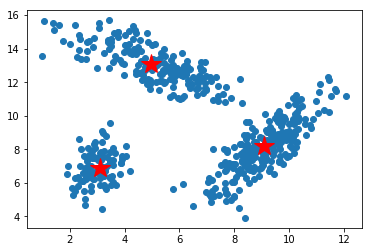

In [47]:
plt.scatter(X[:,0],X[:,1])
plt.plot(centroids[:,0],centroids[:,1],'r*',markersize=20)
plt.show()

# image compression

In [10]:
! pip install opencv-python==3.4.3.18

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize']=[25,25]

768 1024 3
[[[210 113  97]
  [205 112  94]
  [207 122 101]
  ...
  [213 160 120]
  [205 162 111]
  [211 172 113]]

 [[203 107  93]
  [208 116 101]
  [208 126 104]
  ...
  [222 170 130]
  [214 171 118]
  [204 164 105]]

 [[200 110 101]
  [207 121 108]
  [201 124 104]
  ...
  [215 168 122]
  [211 165 113]
  [206 161 104]]

 ...

 [[246 156  68]
  [255 169  82]
  [247 161  78]
  ...
  [242 198 197]
  [242 203 198]
  [236 199 191]]

 [[255 192 101]
  [249 180  89]
  [244 168  82]
  ...
  [239 199 207]
  [242 207 211]
  [219 187 190]]

 [[242 187  94]
  [252 193 101]
  [247 177  89]
  ...
  [229 193 205]
  [234 203 211]
  [230 200 208]]]


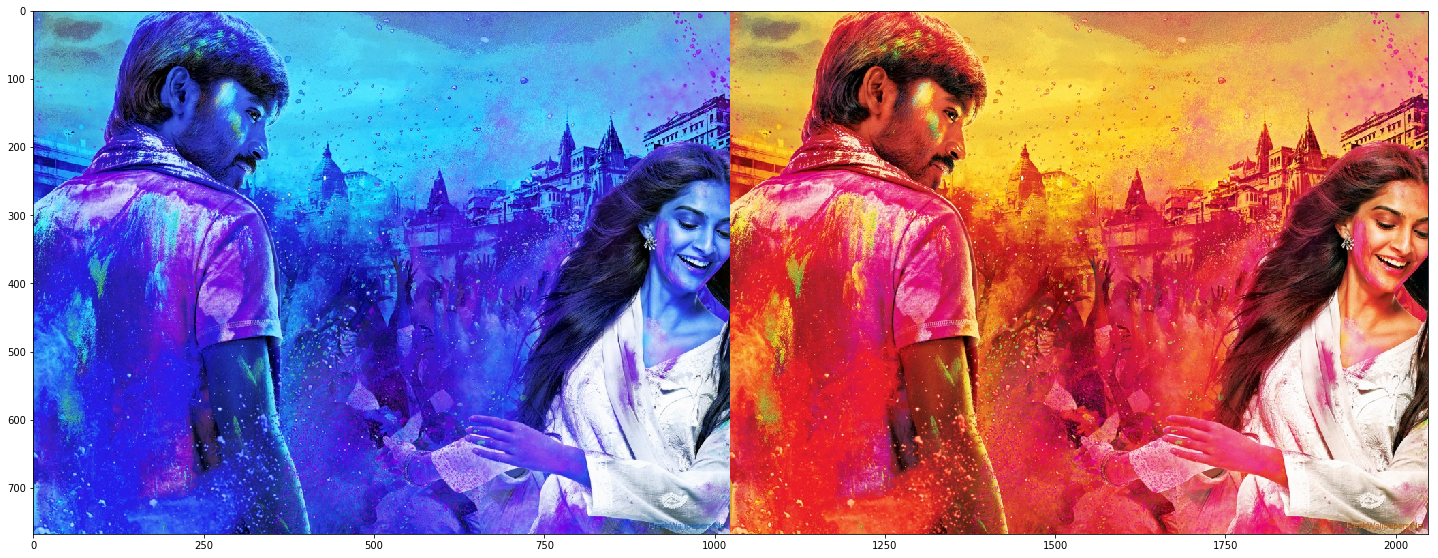

In [5]:
im=cv2.imread('./images/raanjhanaa-wide.jpg')
h,w,c=im.shape
print(h,w,c)
image=cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
print(image)
plt.imshow(np.hstack([im,image]))
plt.show()


In [18]:
cv2.cvtColor(x,cv2.COLOR_RGB2BGR)
cv2.imwrite('compressed.jpg',x2)

NameError: name 'x' is not defined

In [7]:
from platform import python_version
print(python_version())

3.7.0
